# Описание реализации
- Использование библиотеки `nlochman`, которая из файла JSON парсит все нужное в объект типа `nlochman::json`. 
- Реализация `JsonParserFile` заключается в том, что из файла последовательно читается `SIZE_OF_FIELD` байт, которые представляют собой строку вида `{"user": ...,"question": ...,"score":...}`, а затем полученная строка парсится, и данные добавляются в массив мап (`std::vector<std::unordered_map<std::string, std::string>>`), так как файл с данными из задания представляет с собой именно такую структуру.
- Реализация `JsonParserVector` почти полностью повторяет реализацию `JsonParserFile` с единственным отличием в том, что прежде чем начать парсить данные, они полностью загружаются в оперативную память посредством `std::vector<std::string>`.

В данном отчете мы сравним описанные выше реализации по критериям ниже.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Зависимость времени построения JSON объекта для различных реализаций

Проследим за тем как, долго будет строиться объект для нашей реализации и с помощью библиотеки `nlochman`.

In [3]:
PATH_TO_DATA = "../prj.data/json_parser"

Загрузим данные в `pandas` таблицу.

In [4]:
data_nlochman = pd.read_csv(f"{PATH_TO_DATA}/nlochman.csv")
data_custom_parser = pd.read_csv(f"{PATH_TO_DATA}/my_parser.csv")
data_custom_vector_parser = pd.read_csv(f"{PATH_TO_DATA}/my_parser_vector.csv")
data_nlochman.sample(10)

,n,time
49,50,699
9882,9883,91439
1787,1788,24280
7743,7744,70822
4829,4830,48556
5653,5654,50037
7615,7616,68901
1830,1831,16678
6227,6228,58087
1403,1404,13548


Построим необходимые графики.

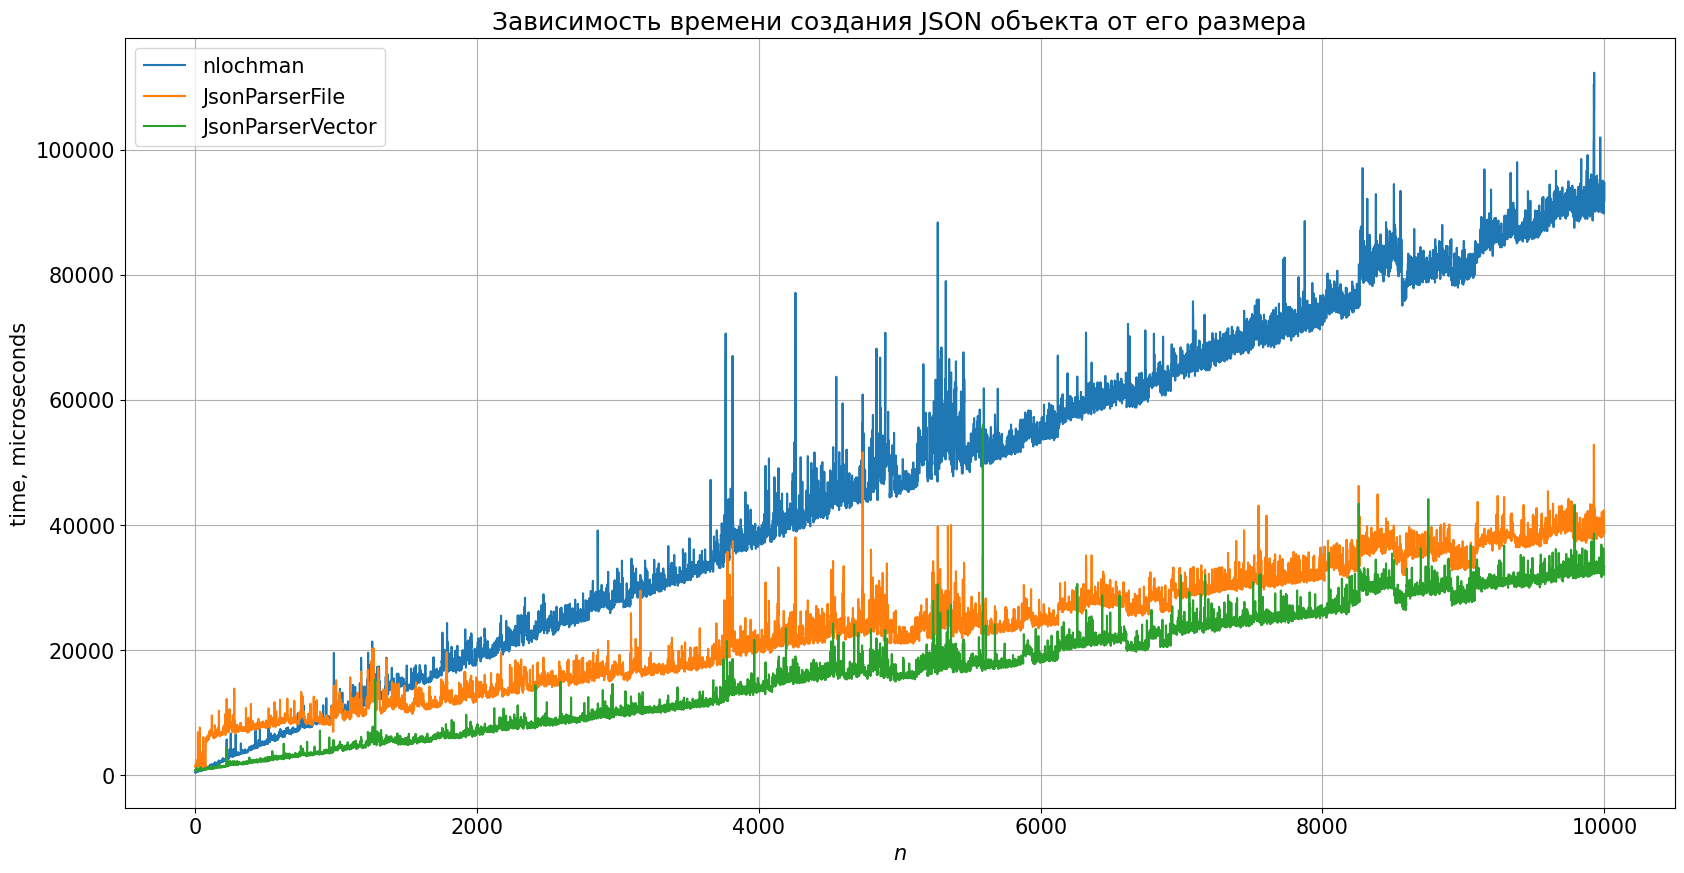

In [11]:
plt.figure(figsize=(20,10))
plt.title("Зависимость времени создания JSON объекта от его размера")
plt.rcParams.update({'font.size': 15})
plt.xlabel(fr"$n$")
plt.ylabel("time, microseconds")
plt.grid()
plt.plot(data_nlochman["n"], data_nlochman["time"], label="nlochman")
plt.plot(data_custom_parser["n"], data_custom_parser["time"], label="JsonParserFile")
plt.plot(data_custom_vector_parser["n"], data_custom_vector_parser["time"], label="JsonParserVector")
plt.legend()
plt.show()

**Выводы:** Как мы видим, наша реализация выигрывает по сравнению с библиотечной реализацией, что достаточно логично, ведь у нас под капотом находится достаточно простая структура, которая будет пригодна для работы с файлами, которые будут структуированны так же, как и файл из задания. `nlochman` в свою очередь же универсален. Однако также можно увидеть, что `JsonParserVector` показывает себя лучше всего, что может быть связано с тем, что постоянные обращения к файлу занимают больше времени, чем единоразовая загрузка всех данных в оперативку.

### Зависимость времени обращения к объекту JSON объекта для различных реализаций

Рассмотрим как долго будет происходить обращение к случайному элементу объекта.

Загрузим данные.

In [7]:
data_nlochman_manipulate = pd.read_csv(f"{PATH_TO_DATA}/nlochman_manipulate.csv")
data_custom_parser_manipulate = pd.read_csv(f"{PATH_TO_DATA}/my_parser_manipulate.csv")
data_custom_vector_parser_manipulate = pd.read_csv(f"{PATH_TO_DATA}/my_parser_vector_manipulate.csv")
data_nlochman_manipulate.sample(10)

,n,time
1349,1350,2274
4207,4208,2064
4138,4139,2525
5557,5558,1903
7591,7592,2344
4303,4304,1853
3326,3327,2775
3662,3663,932
9819,9820,1503
2495,2496,1523


Построим графики.

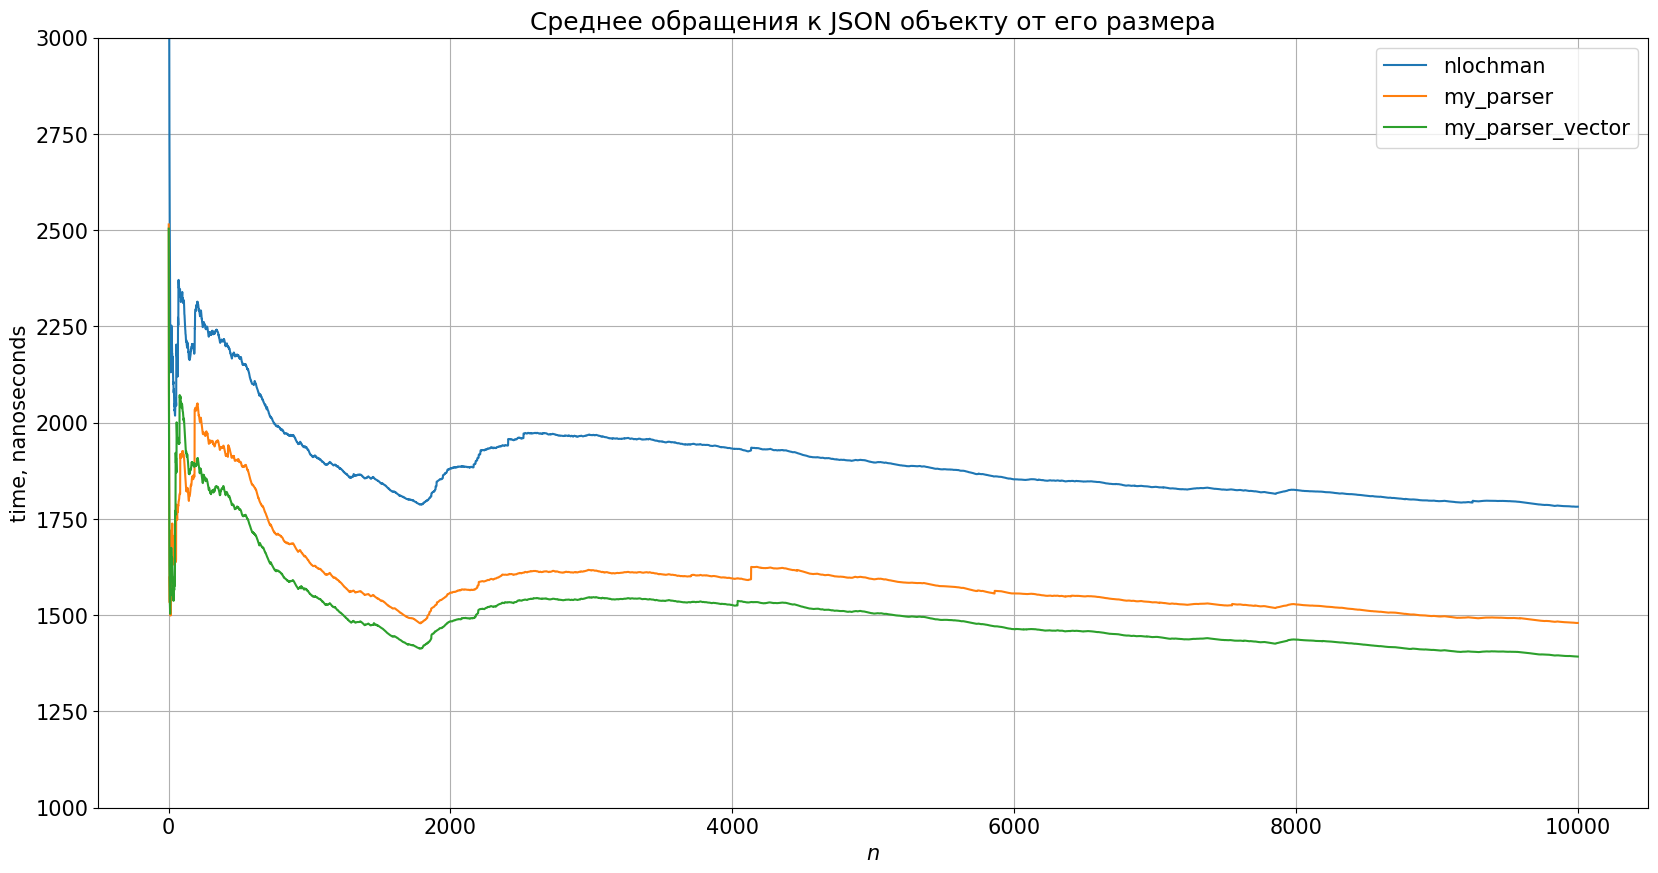

In [10]:
N = len(data_nlochman_manipulate["n"])

plt.figure(figsize=(20,10))
plt.title("Среднее обращения к JSON объекту от его размера")
plt.rcParams.update({'font.size': 15})
plt.xlabel(fr"$n$")
plt.ylabel("time, nanoseconds")
plt.grid()
plt.plot(data_nlochman_manipulate["n"], np.cumsum(data_nlochman_manipulate["time"]) / np.arange(1, N+1), label="nlochman")
plt.plot(data_custom_parser_manipulate["n"], np.cumsum(data_custom_parser_manipulate["time"]) / np.arange(1, N+1), label="JsonParserFile")
plt.plot(data_custom_vector_parser_manipulate["n"], np.cumsum(data_custom_vector_parser_manipulate["time"]) / np.arange(1, N+1), label="JsonParserVector")
plt.ylim(1000, 3000)
plt.legend()
plt.show()

**Вывод:** Как видно из графика, наша реализация опять выигрывает по сравнению с библиотечной по тем же причинам, что и выше. Также реализация `JsonParserVector` снова показывает наилучшие результаты, что, на мой взгяд, довольно странно, ведь при обращении она работает идентично `JsonParserFile`. Поэтому, скорее всего, разница в производительности связана с случайными флуктациями, ведь время работы в среднем отличается на ~50нс.